In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
import datetime


In [2]:
#Question-1

In [7]:
claims= pd.read_csv("C:/Users/USER/Downloads/Python Foundation Case Study 3 - Insurance Claims Case Study/claims.csv")
cust= pd.read_csv("C:/Users/USER/Downloads/Python Foundation Case Study 3 - Insurance Claims Case Study/cust_demographics.csv")

In [9]:
claims.head(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [10]:
cust.head(5)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [12]:
Cust_claims= claims.merge(cust, left_on=['customer_id'], right_on=['CUST_ID'], how='inner')
Cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

In [13]:
#Question-2

In [14]:
Cust_claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [15]:
numeric_columns = Cust_claims.select_dtypes(include = ['float64', 'int64'])
object_columns = Cust_claims.select_dtypes(include = ['object'])

In [16]:
def continuous_var_summary( x ):
    
    # freq and missings
    n_total = x.shape[0]
    n_miss = x.isna().sum()
    perc_miss = n_miss * 100 / n_total
    
    # outliers - iqr
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc_iqr = q1 - 1.5 * iqr
    uc_iqr = q3 + 1.5 * iqr
    
    return pd.Series( [ x.dtype, x.nunique(), n_total, x.count(), n_miss, perc_miss,
                       x.sum(), x.mean(), x.std(), x.var(), 
                       lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.5), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max() ], 
                     
                    index = ['dtype', 'cardinality', 'n_tot', 'n', 'nmiss', 'perc_miss',
                             'sum', 'mean', 'std', 'var',
                        'lc_iqr', 'uc_iqr',
                        'min', 'p1', 'p5', 'p10', 'p25', 'p50', 'p75', 'p90', 'p95', 'p99', 'max']) 


In [17]:
def categorical_var_summary( x ):
    
    Mode = x.value_counts().sort_values(ascending = False)[0:1].reset_index()
    return pd.Series([x.count(), x.isnull().sum(), Mode.iloc[0, 0], Mode.iloc[0, 1], 
                          round(Mode.iloc[0, 1] * 100 / x.count(), 2)], 
                     
                  index = ['n', 'nmiss', 'MODE', 'FREQ', 'PERCENT'])

In [18]:
numeric_audit=numeric_columns.apply( lambda x: continuous_var_summary(x))
numeric_audit

,claim_id,customer_id,total_policy_claims,CUST_ID
dtype,int64,int64,float64,int64
cardinality,1085,1078,8,1078
n_tot,1085,1085,1085,1085
n,1085,1085,1075,1085
nmiss,0,0,10,0
perc_miss,0.0,0.0,0.921659,0.0
sum,53073348315,55083176211,1706.0,55083176211
mean,48915528.400922,50767904.341935,1.586977,50767904.341935
std,29128181.617819,28496245.372373,1.146859,28496245.372373
var,848450964360648.625,812036000322492.625,1.315286,812036000322492.625


In [19]:
# there are id variables and total_policy_claims only which can be processed as per the given data, it requires data type conversions to proper format

In [20]:
categorical_audit= object_columns.apply( lambda x: categorical_var_summary(x))
categorical_audit

,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,fraudulent,gender,DateOfBirth,State,Contact,Segment
n,1085,1085,1085,1085,1085,1020,1085,1085,1085,1085,1085,1085
nmiss,0,0,0,0,0,65,0,0,0,0,0,0
MODE,Other causes,04/04/2018,Auto,No,Material only,$2320,No,Male,18-Oct-72,NY,743-569-4783,Gold
FREQ,285,18,970,621,653,7,838,556,2,31,2,375
PERCENT,26.27,1.66,89.4,57.24,60.18,0.69,77.24,51.24,0.18,2.86,0.18,34.56


In [21]:
# the amount variables, date variables shall be changed to proper formats, contact variable has no business significance for the analysis.

# ###### Data type conversions for variables which are not of proper type

# claim_date, claim_amount($, datatype), DateOfBirth

In [22]:
Cust_claims["DateOfBirth"] = pd.to_datetime(Cust_claims.DateOfBirth, format = "%d-%b-%y")
Cust_claims.loc[(Cust_claims.DateOfBirth.dt.year > 2020),"DateOfBirth"]=Cust_claims[Cust_claims.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))

In [26]:
Cust_claims["claim_date"] = pd.to_datetime(Cust_claims.claim_date, format = "%m/%d/%Y")

In [24]:
#Question-3

In [27]:
Cust_claims["claim_amount"]= Cust_claims['claim_amount'].astype(str)
Cust_claims['claim_amount'] = Cust_claims['claim_amount'].str.replace('$','')
Cust_claims['claim_amount']= np.where(Cust_claims.claim_amount== "nan","",Cust_claims.claim_amount )

C:\Users\USER\AppData\Local\Temp\ipykernel_11124\1006674452.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Cust_claims['claim_amount'] = Cust_claims['claim_amount'].str.replace('$','')


In [28]:
Cust_claims['claim_amount'] = pd.to_numeric(Cust_claims['claim_amount'])
np.dtype(Cust_claims.claim_amount)

dtype('float64')

In [29]:
#Question-4

In [30]:
Cust_claims['unreported_claims']= np.where(Cust_claims.police_report== 'Unknown',1,0)
Cust_claims.head(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1
2,53522022,30308357,Other driver error,2018-02-02,Auto,No,Material only,3369.5,1.0,Yes,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0
4,13015401,47830476,Natural causes,2018-06-17,Auto,No,Material only,1680.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,0
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,1
6,22890252,19269962,Crime,2018-01-13,Auto,No,Material only,2680.0,1.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0
8,24050443,21831191,Other driver error,2017-10-04,Auto,No,Injury only,38306.5,3.0,Yes,21831191,Male,1977-05-17,NH,419-712-8513,Gold,0
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,21831191,Male,1977-05-17,NH,419-712-8513,Gold,1


In [31]:
#Question-5

In [32]:
Cust_claims= Cust_claims.drop_duplicates(subset="customer_id", keep= "last")

In [33]:
#Question-6

In [34]:
Cust_claims.isna().sum()

claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
unreported_claims       0
dtype: int64

In [36]:
Cust_claims["claim_amount"]= Cust_claims['claim_amount'].replace(np.NaN,Cust_claims['claim_amount'].mean())
Cust_claims["claim_amount"].isna().sum()


0

In [37]:
Cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1084
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1078 non-null   int64         
 1   customer_id          1078 non-null   int64         
 2   incident_cause       1078 non-null   object        
 3   claim_date           1078 non-null   datetime64[ns]
 4   claim_area           1078 non-null   object        
 5   police_report        1078 non-null   object        
 6   claim_type           1078 non-null   object        
 7   claim_amount         1078 non-null   float64       
 8   total_policy_claims  1068 non-null   float64       
 9   fraudulent           1078 non-null   object        
 10  CUST_ID              1078 non-null   int64         
 11  gender               1078 non-null   object        
 12  DateOfBirth          1078 non-null   datetime64[ns]
 13  State                1078 non-nul

In [38]:
Cust_claims["total_policy_claims"] = Cust_claims['total_policy_claims'].fillna(Cust_claims['total_policy_claims'].mode()[0])

In [39]:
Cust_claims["total_policy_claims"]= Cust_claims["total_policy_claims"].astype(str)

In [40]:
Cust_claims["total_policy_claims"].isna().sum()

0

In [41]:
#Question-7

In [42]:
curr_year = pd.to_datetime('today').year
dob_year = pd.DatetimeIndex(Cust_claims['DateOfBirth']).year          #extract year from DateOfBirth
x = dob_year-100                                               # for the years which belongs to 60's
v = curr_year - x
y = curr_year - dob_year
Cust_claims['age'] = (np.where(dob_year > curr_year,v,y))
#Categorising
Cust_claims.loc[(Cust_claims.age < 18),'AgeGroup'] = 'Children'
Cust_claims.loc[(Cust_claims.age >=18) & (Cust_claims.age <30),'AgeGroup'] = 'Youth'
Cust_claims.loc[(Cust_claims.age >=30) & (Cust_claims.age <60),'AgeGroup'] = 'Adult'
Cust_claims.loc[(Cust_claims.age >=60),'AgeGroup'] = 'Senior'

In [43]:
Cust_claims.head(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment,unreported_claims,age,AgeGroup
0,54004764,21868593,Driver error,2017-11-27,Auto,No,Material only,2980.0,1.0,No,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,0,43,Adult
1,33985796,75740424,Crime,2018-10-03,Home,Unknown,Material only,2980.0,3.0,No,75740424,Female,1970-01-13,ME,265-543-1264,Silver,1,52,Adult
3,63017412,30308357,Driver error,2018-04-04,Auto,No,Material only,1950.0,6.0,No,30308357,Female,1984-03-11,TN,798-631-4758,Silver,0,38,Adult
5,91609100,47830476,Natural causes,2017-04-12,Auto,Unknown,Material only,1440.0,1.0,No,47830476,Female,1986-05-01,MA,413-187-7945,Silver,1,36,Adult
7,39219616,19269962,Other causes,2018-09-26,Auto,No,Material only,2240.0,2.0,No,19269962,Male,1977-05-13,NV,956-871-8691,Gold,0,45,Adult
9,91475471,21831191,Driver error,2018-02-09,Auto,Unknown,Material and injury,36810.0,1.0,No,21831191,Male,1977-05-17,NH,419-712-8513,Gold,1,45,Adult
10,12878692,18401412,Driver error,2018-01-13,Auto,No,Material only,1730.0,4.0,No,18401412,Male,1999-03-02,AR,752-398-2914,Gold,0,23,Youth
11,27026412,73486606,Natural causes,2018-04-10,Auto,No,Material only,1160.0,3.0,No,73486606,Male,1999-10-25,AK,256-968-9172,Silver,0,23,Youth
12,43908336,32813689,Crime,2018-02-15,Auto,Unknown,Material only,2620.0,1.0,No,32813689,Male,1993-10-12,ID,142-324-7481,Silver,1,29,Youth
13,63246959,33507197,Crime,2017-07-22,Auto,No,Material only,2748.5,2.0,Yes,33507197,Female,1966-09-09,RI,165-519-4583,Gold,0,56,Adult


In [44]:
Cust_claims.groupby(["AgeGroup"])["age"].count()

AgeGroup
Adult     795
Senior     75
Youth     208
Name: age, dtype: int64

In [45]:
#Question-8

In [46]:
Avg_amount_segment= round(Cust_claims.groupby(["Segment"])["claim_amount"].mean(),2)
Avg_amount_segment

Segment
Gold        12846.39
Platinum    12371.64
Silver      12267.15
Name: claim_amount, dtype: float64

In [47]:
#Question-9

In [48]:
Amount_incedent= round(Cust_claims.loc[Cust_claims.claim_date < "2018-09-10",:].groupby("incident_cause")["claim_amount"].sum().add_prefix("total_"),2)
Amount_incedent

incident_cause
total_Crime                  721937.45
total_Driver error          3315847.88
total_Natural causes        1312744.91
total_Other causes          3723147.30
total_Other driver error    3277533.37
Name: claim_amount, dtype: float64

In [49]:
#Question-10

In [50]:
Cust_claims.columns

Index(['claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent', 'CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact',
       'Segment', 'unreported_claims', 'age', 'AgeGroup'],
      dtype='object')

In [52]:
Adults_claims_count= Cust_claims.loc[(Cust_claims.incident_cause.str.lower().str.contains("driver") & (Cust_claims.State== "TX") | (Cust_claims.State== "DE") | (Cust_claims.State== "AK")) ].groupby(["State"])["claim_amount"].count()
Adults_claims_count

State
AK    19
DE    29
TX    10
Name: claim_amount, dtype: int64

In [53]:
#Question-11

In [54]:
Claim_gender_segment= round(Cust_claims.groupby(["Segment", "gender"])["claim_amount"].sum().reset_index(),2)
Claim_gender_segment

,Segment,gender,claim_amount
0,Gold,Female,2110042.41
1,Gold,Male,2655966.87
2,Platinum,Female,2369720.43
3,Platinum,Male,2096443.42
4,Silver,Female,1897301.87
5,Silver,Male,2347130.84


In [55]:
Claim_gender_segment_pivot= Claim_gender_segment.pivot(index="Segment", columns= "gender", values= "claim_amount")
Claim_gender_segment_pivot


gender,Female,Male
Segment,,
Gold,2110042.41,2655966.87
Platinum,2369720.43,2096443.42
Silver,1897301.87,2347130.84


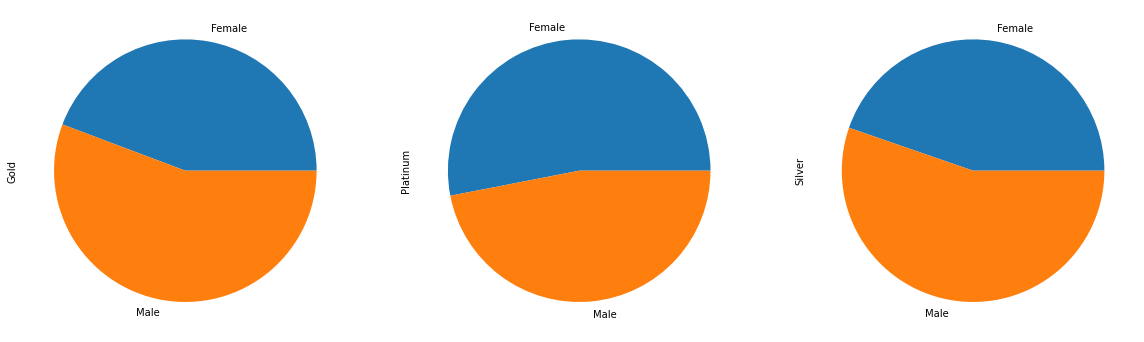

In [56]:
Claim_gender_segment_pivot.T.plot(kind="pie", subplots= True, legend= False,figsize=(20,10))
plt.show()

In [57]:
#Question-12

In [58]:
Claim_gender_driver= Cust_claims.loc[(Cust_claims.incident_cause.str.lower().str.contains("driver"))].groupby(["gender"])[["gender"]].count().add_prefix("countOf_").reset_index()
Claim_gender_driver


,gender,countOf_gender
0,Female,221
1,Male,281


[]

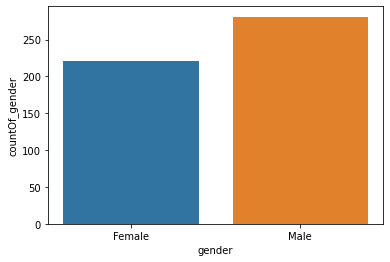

In [59]:
sns.barplot(x= "gender", y= "countOf_gender", data= Claim_gender_driver)
plt.plot()

In [60]:
#Question-13

In [61]:
Cust_claims["Frauds"]= np.where(Cust_claims.fraudulent == "Yes",1,0)

In [62]:
AgeGroup_max_frauds= Cust_claims.groupby(["AgeGroup"])["Frauds"].sum().reset_index()
AgeGroup_max_frauds


,AgeGroup,Frauds
0,Adult,185
1,Senior,21
2,Youth,39


[]

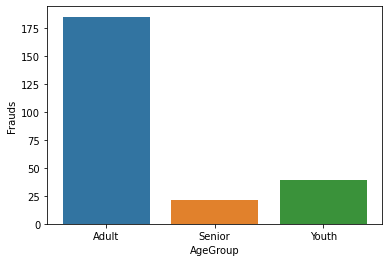

In [63]:
sns.barplot(x= "AgeGroup", y="Frauds", data=AgeGroup_max_frauds )
plt.plot()

In [64]:
#Question-14

In [65]:
Cust_claims['claim_month'] = pd.to_datetime(Cust_claims['claim_date'])
Cust_claims['Claim_month'] = Cust_claims['claim_month'].dt.month


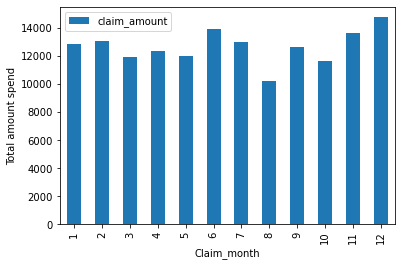

In [66]:
pd.pivot_table(Cust_claims,index="Claim_month",values="claim_amount").plot(kind='bar')
plt.ylabel('Total amount spend')
plt.show()


In [67]:
#Question-15

In [68]:
Frauds_amount_gender= pd.DataFrame(Cust_claims.loc[(Cust_claims.fraudulent=="Yes")].groupby(["gender","AgeGroup"])[["claim_amount"]].mean().add_prefix("Fraud_"))
Non_Frauds_amount_gender=pd.DataFrame(Cust_claims.loc[(Cust_claims.fraudulent=="No")].groupby(["gender","AgeGroup"])[["claim_amount"]].mean().add_prefix("Non_Fraud_"))

In [70]:
Claims_age_gender=round(pd.merge(Frauds_amount_gender,Non_Frauds_amount_gender, on=["gender","AgeGroup"]),2)
Claims_age_gender

Fraud_claim_amount  Non_Fraud_claim_amount
gender AgeGroup                                            
Female Adult               12630.10                11982.03
       Senior               3779.08                14965.37
       Youth                9220.45                13174.54
Male   Adult               16049.17                12375.02
       Senior              16879.12                12607.77
       Youth                7799.61                12089.53

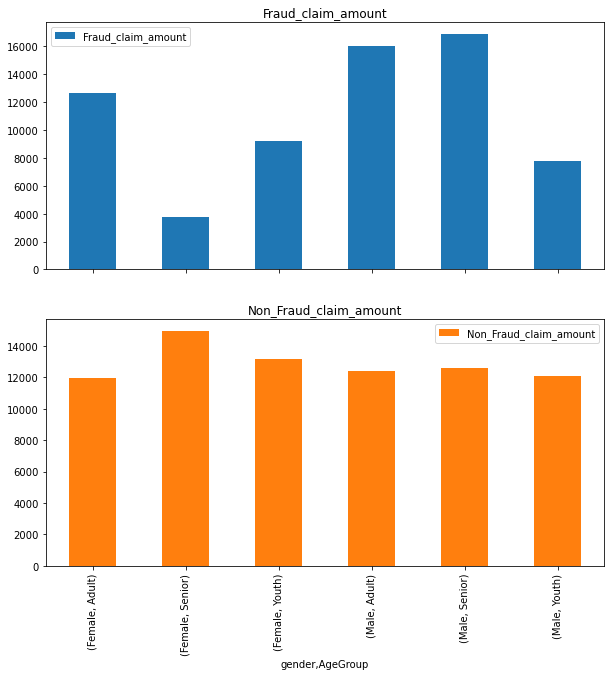

In [71]:
Claims_age_gender.plot(kind="bar", subplots= True, legend= True,figsize=(10,10))
plt.show()

In [72]:
#Question-16

In [73]:
claim_male = Cust_claims['claim_amount'].loc[Cust_claims['gender']=="Male"]
claim_female = Cust_claims['claim_amount'].loc[Cust_claims['gender']=="Female"]

In [74]:
print("The average amount claimed by males is {}".format(claim_male.mean()))

print("The average amount claimed by females is {}".format(claim_female.mean()))

The average amount claimed by males is 12884.829631308425
The average amount claimed by females is 12100.692029236623


In [75]:

import scipy.stats as stats
#checking the variance

eq_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=True)    # equal variance
eq_var.statistic


0.9630529881732577

In [76]:
uneq_var = stats.ttest_ind(a= claim_male,
                b= claim_female,
                equal_var=False)    # UnEqual variance
uneq_var.statistic


0.9637241707490979

In [77]:
t= eq_var.statistic
p= eq_var.pvalue

print(" For the above test, the t-score is {} and the p-value is {}".format(t,p))

if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

 For the above test, the t-score is 0.9630529881732577 and the p-value is 0.3357373087404285
We fail to reject null hypothesis


In [78]:
# As the significance value of t test is greater than 0.05 we can safely conclude that there is a similarity in amount claimed by males and females.

In [79]:
#Question-17

In [80]:
agecat_seg = pd.crosstab(Cust_claims.AgeGroup, Cust_claims.Segment, margins = True)
agecat_seg

Segment,Gold,Platinum,Silver,All
AgeGroup,,,,
Adult,272,266,257,795
Senior,28,26,21,75
Youth,71,69,68,208
All,371,361,346,1078


In [81]:
Chi_test = stats.chi2_contingency(observed= agecat_seg)
Chi_test

(0.6654696397990999,
 0.999896981610665,
 9,
 array([[ 273.6038961 ,  266.22912801,  255.16697588,  795.        ],
        [  25.81168831,   25.11595547,   24.07235622,   75.        ],
        [  71.58441558,   69.65491651,   66.7606679 ,  208.        ],
        [ 371.        ,  361.        ,  346.        , 1078.        ]]))

In [82]:
print("The chi square stat is {} and the p value is {}".format(Chi_test[0],Chi_test[1]))

The chi square stat is 0.6654696397990999 and the p value is 0.999896981610665


In [83]:
# Since the significance value of the test is greter than 0.05, we fail reject the null hypothesis. Therefore there is no relationship between age category and segment

In [84]:
#Question-18

In [85]:
Cust_claims["Year"]= Cust_claims['claim_month'].dt.year

In [86]:
#current year as per the data given in 2018

In [87]:
Current_year= Cust_claims.loc[Cust_claims.Year == 2018]["claim_amount"]
amt_2016_17= Cust_claims.loc[Cust_claims.Year==2017]["claim_amount"]

In [ ]:
stats.pearsonr(Current_year,amt_2016_17)

In [89]:
#Question-19

In [90]:
# Here we will perform Ftest ANOVA

# H0 : mean(AgeGroup[Youth]) == mean(AgeGroup[Adult]) (No difference between age groups and insurance claims or No influence of age groups on insurance claims) Ha : mean(AgeGroup[Youth]) != mean(AgeGroup[Adult]) (There is some difference between age groups and insurance claims or there is some influence of age groups on insurance claims)

In [92]:
age_group_1 = Cust_claims['total_policy_claims'].loc[Cust_claims['AgeGroup']=="Youth"]
age_group_2 = Cust_claims['total_policy_claims'].loc[Cust_claims['AgeGroup']=="Adult"]
# Perfrom the Anova
anova = stats.f_oneway(age_group_1,age_group_2)
# Statistic :  F Value
f = anova.statistic
p = anova.pvalue
print("The f-value is {} and the p value is {}".format(f,p))
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

The f-value is 0.9080839705107974 and the p value is 0.34085335479229917
We fail to reject null hypothesis


In [93]:
# Since the significance value of the test is greater than 0.05, we fail reject the null hypothesis. Therefore, there is no difference between age groups and insurance claims or No influence of age groups on insurance claims

In [94]:
Cust_claims['total_policy_claims'] = pd.to_numeric(Cust_claims['total_policy_claims'])

In [95]:
#Correlation
Cust_claims.total_policy_claims.corr(other= Cust_claims.claim_amount)

-0.022392720732099986

In [96]:
# As the correlation is negative the number of policy claims in inversely propotional to the claimed amount.